# Compressing images in the YCoCg domain

Compare the performance of compressing images in the RGB and YCoCg domains.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
import image
import YCoCg as YUV
import deadzone as Q
import distortion
import information

## Global parameters of the notebook

In [2]:
#test_image = "../sequences/stockholm/"
test_image = "../sequences/lena_color/"
#test_image = "../sequences/lena_bw/"

Q_steps = [128, 64, 32, 16, 8, 4, 2]

## RD curve in the RGB domain

In [3]:
x = image.read(test_image, 0)

RGB_points = []
for Q_step in Q_steps:
    x_k = Q.quantize(x, Q_step)
    x_dQ = Q.dequantize(x_k, Q_step)
    BPP = image.write(x_k.astype(np.uint8), f"/tmp/RGB_{Q_step}_", 0)*8/x.size
    __ = image.read(f"/tmp/RGB_{Q_step}_", 0)
    assert (x_k == __).all()
    MSE = distortion.MSE(x, x_dQ)
    point = (BPP, MSE)
    print(point)
    RGB_points.append(point)

image.read: ../sequences/lena_color/000.png (512, 512, 3) uint8 512673 
image.write: /tmp/RGB_128_000.png (512, 512, 3) uint8 44233 
image.read: /tmp/RGB_128_000.png (512, 512, 3) uint8 44233 
(0.4499613444010417, 6275.985763549805)
image.write: /tmp/RGB_64_000.png (512, 512, 3) uint8 82729 
image.read: /tmp/RGB_64_000.png (512, 512, 3) uint8 82729 
(0.8415629069010416, 1263.851323445638)
image.write: /tmp/RGB_32_000.png (512, 512, 3) uint8 130856 
image.read: /tmp/RGB_32_000.png (512, 512, 3) uint8 130856 
(1.3311360677083333, 335.0475311279297)
image.write: /tmp/RGB_16_000.png (512, 512, 3) uint8 184307 
image.read: /tmp/RGB_16_000.png (512, 512, 3) uint8 184307 
(1.8748677571614583, 79.06820170084636)
image.write: /tmp/RGB_8_000.png (512, 512, 3) uint8 248927 
image.read: /tmp/RGB_8_000.png (512, 512, 3) uint8 248927 
(2.5322163899739585, 17.54657491048177)
image.write: /tmp/RGB_4_000.png (512, 512, 3) uint8 331111 
image.read: /tmp/RGB_4_000.png (512, 512, 3) uint8 331111 
(3.36823

## RD curve in the YUV domain

In [4]:
x = image.read(test_image, 0)
xx = YUV.from_RGB(x.astype(np.int16))

YUV_points = []
for Q_step in Q_steps:
    xx_k = Q.quantize(xx, Q_step)
    xx_dQ = Q.dequantize(xx_k, Q_step)
    print(xx_k.dtype, xx_k.max(), xx_k.min())
    #BPP = image.write((xx_k.astype(np.int32) + 32768).astype(np.uint16), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #__ = image.read(f"/tmp/YUV_{Q_step}_", 0).astype(np.int32) - 32768
    #BPP = image.write((xx_k.astype(np.int16) + 128).astype(np.uint8), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #__ = image.read(f"/tmp/YUV_{Q_step}_", 0).astype(np.int32) - 128
    BPP = image.write((xx_k + 128).astype(np.uint8), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    __ = image.read(f"/tmp/YUV_{Q_step}_", 0).astype(np.int16) - 128
    #BPP = image.write(xx_k, f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #BPP = image.write((xx_k + 128).astype(np.uint8), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #BPP = image.write(xx_k + xx_k.min(), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #BPP = image.write(xx_k - xx.min(), f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #BPP = image.write(xx_k + 256, f"/tmp/YUV_{Q_step}_", 0)*8/x.size
    #for i in range(512):
    #    for j in range(512):
    #        if (xx_k[i,j] != __[i,j]).any():
    #            print(Q_step, i, j, x_k[i,j], __[i,j])
    #            break
    assert (xx_k == __).all()
    x_dQ = YUV.to_RGB(xx_dQ)
    MSE = distortion.MSE(x, x_dQ)
    point = (BPP, MSE)
    print(point)
    YUV_points.append(point)

image.read: ../sequences/lena_color/000.png (512, 512, 3) uint8 512673 
int16 1 0
image.write: /tmp/YUV_128_000.png (512, 512, 3) uint8 22048 
image.read: /tmp/YUV_128_000.png (512, 512, 3) uint8 22048 
(0.22428385416666666, 7777.011805216472)
int16 3 0
image.write: /tmp/YUV_64_000.png (512, 512, 3) uint8 46500 
image.read: /tmp/YUV_64_000.png (512, 512, 3) uint8 46500 
(0.4730224609375, 3532.5907440185547)
int16 7 -1
image.write: /tmp/YUV_32_000.png (512, 512, 3) uint8 86246 
image.read: /tmp/YUV_32_000.png (512, 512, 3) uint8 86246 
(0.8773396809895834, 1292.4576873779297)
int16 15 -3
image.write: /tmp/YUV_16_000.png (512, 512, 3) uint8 138245 
image.read: /tmp/YUV_16_000.png (512, 512, 3) uint8 138245 
(1.4063008626302083, 289.1937713623047)
int16 30 -7
image.write: /tmp/YUV_8_000.png (512, 512, 3) uint8 196494 
image.read: /tmp/YUV_8_000.png (512, 512, 3) uint8 196494 
(1.99884033203125, 63.12000020345052)
int16 60 -15
image.write: /tmp/YUV_4_000.png (512, 512, 3) uint8 263886 
ima

## Compare

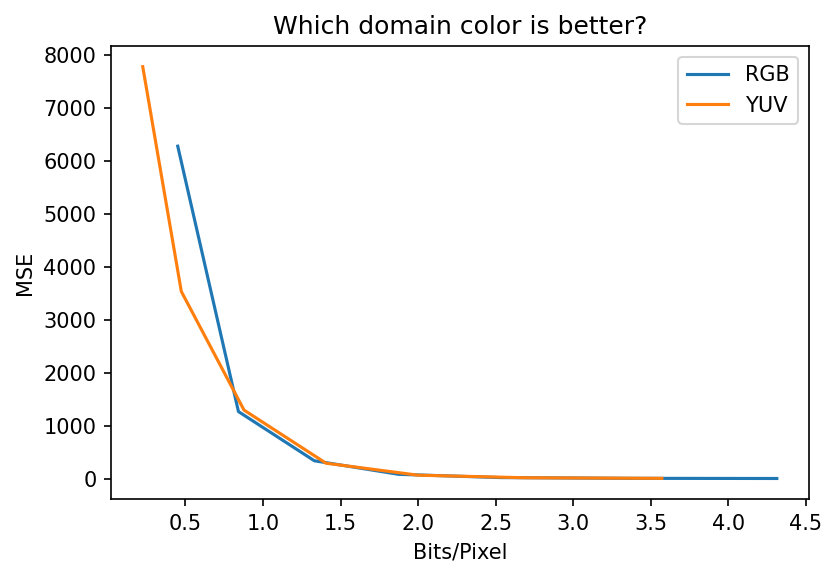

In [5]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RGB_points), label="RGB")
pylab.plot(*zip(*YUV_points), label="YUV")
pylab.title("Which domain color is better?")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc="best")
pylab.show()

The YCoCg domain seems to be better than the RGB one at low bit-rates.

Please, confirm this for other images. Plot the average curve considering also the standard deviation.

## Let's optimize the quantization step

In the previous experiment we have used the same quantization step for the three color components. However, although this is the fastest quantization strategy, not necessaryly have to be the optimal one from a RD perpestive because the components contribution to the reconstructed image can be different.

Let's compute the RD contribution (a slope in the RD curve) of each component for each quantization step, and define a quantization algoritm in which we select progressively smaller contributions, starting at the higher one. Initially, we will supose that the YUV transform is orthogonal and therefore, we can estimate the distortion of the reconstructed image (that obviously is in the RGB domain) in the YUV domain. However, we will also compare with the most general option in which the color transform does not need to be orthogonal, in which we will compare in the RGB domain.

In [6]:
# Read the image and move to the YUV domain.
x = image.read(test_image, 0)
xx = YUV.from_RGB(x.astype(np.int16))

image.read: ../sequences/lena_color/000.png (512, 512, 3) uint8 512673 


In [7]:
for i in range(3):
    print(xx[...,i].max(), xx[...,i].min())

241 27
117 -48
33 -60


In [8]:
# Create a list of RD points and a list of RD slopes.
RD_points = []
RD_slopes = []
RD_points2 = [] # MSEs in the RGB domain
RD_slopes2 = []
for i in range(3):
    comp = xx[..., i]
    comp_energy = information.energy(comp)
    # The first point of each RD curve has a distortion 
    # equal to the energy of the component and a rate=0
    RD_points.append([(0, comp_energy)])
    RD_slopes.append([])
    RD_points2.append([(0, comp_energy)])
    RD_slopes2.append([])

In [9]:
# Now populate the rest of points of each component.
# Version in which we estimate the distortion in the YUV domain.
for i in range(3):
    comp = xx[..., i]
    Q_step_number = 0
    for Q_step in Q_steps:
        print(Q_step)
        comp_k = Q.quantize(comp, Q_step)
        comp_dQ = Q.dequantize(comp_k, Q_step)
        MSE = distortion.MSE(comp, comp_dQ)
        BPP = image.write((comp_k + 128).astype(np.uint8), f"/tmp/{i}_{Q_step}_", 0)*8/x.size
        RD_points[i].append((BPP, MSE))
        delta_BPP = BPP - RD_points[i][Q_step_number][0]
        delta_MSE = RD_points[i][Q_step_number][1] - MSE
        if delta_BPP > 0:
            slope = delta_MSE/delta_BPP
        else:
            slope = 0
        RD_slopes[i].append((Q_step, slope, i))
        Q_step_number += 1

128
image.write: /tmp/0_128_000.png (512, 512, 3) uint8 26964 
64
image.write: /tmp/0_64_000.png (512, 512, 3) uint8 48053 
32
image.write: /tmp/0_32_000.png (512, 512, 3) uint8 73175 
16
image.write: /tmp/0_16_000.png (512, 512, 3) uint8 119683 
8
image.write: /tmp/0_8_000.png (512, 512, 3) uint8 187735 
4
image.write: /tmp/0_4_000.png (512, 512, 3) uint8 275429 
2
image.write: /tmp/0_2_000.png (512, 512, 3) uint8 372105 
128
image.write: /tmp/1_128_000.png (512, 512, 3) uint8 2254 
64
image.write: /tmp/1_64_000.png (512, 512, 3) uint8 15550 
32
image.write: /tmp/1_32_000.png (512, 512, 3) uint8 38270 
16
image.write: /tmp/1_16_000.png (512, 512, 3) uint8 80109 
8
image.write: /tmp/1_8_000.png (512, 512, 3) uint8 143911 
4
image.write: /tmp/1_4_000.png (512, 512, 3) uint8 223463 
2
image.write: /tmp/1_2_000.png (512, 512, 3) uint8 316173 
128
image.write: /tmp/2_128_000.png (512, 512, 3) uint8 2254 
64
image.write: /tmp/2_64_000.png (512, 512, 3) uint8 2254 
32
image.write: /tmp/2_32_

In [10]:
# Now populate the rest of points of each component.
# Version in which we measure the distortion in the RGB domain.
for i in range(3):
    Q_step_number = 0
    for Q_step in Q_steps:
        xx_ = xx.copy()
        print(Q_step)
        comp_k = Q.quantize(xx_[..., i], Q_step)
        xx_[..., i] = Q.dequantize(comp_k, Q_step)
        MSE = distortion.MSE(x, YUV.to_RGB(xx_))
        BPP = image.write((comp_k + 128).astype(np.uint8), f"/tmp/{i}_{Q_step}_", 0)*8/x.size
        RD_points2[i].append((BPP, MSE))
        delta_BPP = BPP - RD_points[i][Q_step_number][0]
        delta_MSE = RD_points[i][Q_step_number][1] - MSE
        if delta_BPP > 0:
            slope = delta_MSE/delta_BPP
        else:
            slope = 0
        RD_slopes2[i].append((Q_step, slope, i))
        Q_step_number += 1

128
image.write: /tmp/0_128_000.png (512, 512, 3) uint8 26964 
64
image.write: /tmp/0_64_000.png (512, 512, 3) uint8 48053 
32
image.write: /tmp/0_32_000.png (512, 512, 3) uint8 73175 
16
image.write: /tmp/0_16_000.png (512, 512, 3) uint8 119683 
8
image.write: /tmp/0_8_000.png (512, 512, 3) uint8 187735 
4
image.write: /tmp/0_4_000.png (512, 512, 3) uint8 275429 
2
image.write: /tmp/0_2_000.png (512, 512, 3) uint8 372105 
128
image.write: /tmp/1_128_000.png (512, 512, 3) uint8 2254 
64
image.write: /tmp/1_64_000.png (512, 512, 3) uint8 15550 
32
image.write: /tmp/1_32_000.png (512, 512, 3) uint8 38270 
16
image.write: /tmp/1_16_000.png (512, 512, 3) uint8 80109 
8
image.write: /tmp/1_8_000.png (512, 512, 3) uint8 143911 
4
image.write: /tmp/1_4_000.png (512, 512, 3) uint8 223463 
2
image.write: /tmp/1_2_000.png (512, 512, 3) uint8 316173 
128
image.write: /tmp/2_128_000.png (512, 512, 3) uint8 2254 
64
image.write: /tmp/2_64_000.png (512, 512, 3) uint8 2254 
32
image.write: /tmp/2_32_

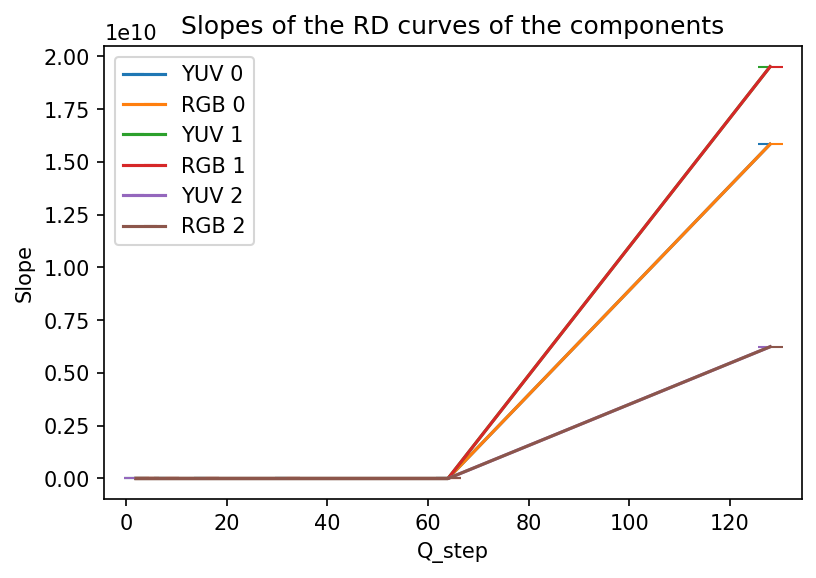

In [11]:
RD_slopes_without_sb_index = []
for i in range(3):
    RD_slopes_without_sb_index.append([])
for i in range(3):
    for Q_step in range(len(Q_steps)):
        RD_slopes_without_sb_index[i].append(RD_slopes[i][Q_step][0:2])

RD_slopes_without_sb_index2 = []
for i in range(3):
    RD_slopes_without_sb_index2.append([])
for i in range(3):
    for Q_step in range(len(Q_steps)):
        RD_slopes_without_sb_index2[i].append(RD_slopes2[i][Q_step][0:2])

pylab.figure(dpi=150)
for i in range(3):
    pylab.plot(*zip(*RD_slopes_without_sb_index[i]), label=f"YUV {i}", marker=0)
    pylab.plot(*zip(*RD_slopes_without_sb_index2[i]), label=f"RGB {i}", marker=1)
pylab.title("Slopes of the RD curves of the components")
pylab.xlabel("Q_step")
pylab.ylabel("Slope")
plt.legend(loc="best")
pylab.show()

In [12]:
# Sort the slopes
single_list = []
single_list2 = []
for i in range(3):
    for Q_step in range(len(Q_steps)):
        single_list.append(tuple(RD_slopes[i][Q_step]))
        single_list2.append(tuple(RD_slopes2[i][Q_step]))
sorted_slopes = sorted(single_list, key=lambda x: x[1])[::-1]
sorted_slopes2 = sorted(single_list2, key=lambda x: x[1])[::-1]

In [13]:
print("MSE in YUV domain\t\t MSE in RGB domain")
for i, j in zip(sorted_slopes, sorted_slopes2):
    print(i, '\t', j)

MSE in YUV domain		 MSE in RGB domain
(128, 19516324083.78843, 1) 	 (128, 19516348331.38692, 1)
(128, 15843734924.775743, 0) 	 (128, 15843734705.299139, 0)
(128, 6242523111.71972, 2) 	 (128, 6242522150.243289, 2)
(64, 17203.13718052065, 0) 	 (64, 17052.526002892504, 0)
(32, 5462.996830985916, 1) 	 (32, 5912.75488556338, 1)
(32, 4088.238834487699, 0) 	 (64, 4680.048661251503, 1)
(16, 1507.5237495076801, 2) 	 (32, 4024.398410755512, 0)
(64, 848.4801444043321, 1) 	 (16, 1471.531158920835, 2)
(16, 590.158273381295, 1) 	 (16, 644.1519873801956, 1)
(16, 540.9701556721424, 0) 	 (16, 523.950650963275, 0)
(8, 232.79668764098307, 2) 	 (8, 220.74587810162654, 2)
(32, 228.07729242300036, 2) 	 (32, 149.2868066127961, 2)
(8, 94.53625278204444, 1) 	 (8, 100.55535876618288, 1)
(8, 86.67236818903191, 0) 	 (8, 80.7353329071886, 0)
(4, 19.630492581263045, 2) 	 (4, 16.88685388173773, 1)
(4, 16.88261765888978, 1) 	 (4, 16.6477475771177, 2)
(4, 15.738556799781055, 0) 	 (4, 13.348790966314686, 0)
(2, 3.51787

In [14]:
def quantize(x, Q_steps):
    x_k = np.empty_like(x)
    for i in range(x.shape[2]):
        x_k[..., i] = Q.quantize(x[..., i], Q_steps[i])
    return x_k

def dequantize(x_k, Q_steps):
    x_dQ = np.empty_like(x_k)
    for i in range(x.shape[2]):
        x_dQ[..., i] = Q.dequantize(x_k[..., i], Q_steps[i])
    return x_dQ

In [15]:
# Find the optimal RD curve
optimal_RD_points = []
zz = np.zeros_like(xx)
Q_steps_combination = np.full(shape=(3,), fill_value=99999999)
for s in sorted_slopes:
    component_number = s[2]
    Q_steps_combination[component_number] = s[0]
    print(component_number, Q_steps_combination[component_number])
    zz[..., component_number] = xx[..., component_number]
    zz_k = quantize(zz, Q_steps_combination)
    zz_dQ = dequantize(zz_k, Q_steps_combination)
    z_dQ = YUV.to_RGB(zz_dQ)
    # If the color transform domain is not linear, the MSE should be measured in the RGB domain
    MSE = distortion.MSE(xx, zz_dQ)
    BPP = image.write((zz_k + 128).astype(np.uint8), f"/tmp/{component_number}_{Q_step}_", 0)*8/x.size
    optimal_RD_points.append((BPP, MSE))

1 128
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 2254 
0 128
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 22048 
2 128
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 22048 
0 64
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 38938 
1 32
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 58981 
0 32
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 76378 
2 16
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 96824 
1 64
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 89457 
1 16
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 115237 
0 16
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 138245 
2 8
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 146955 
2 32
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 130271 
1 8
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 158906 
0 8
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 187663 
2 4
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 211922 
1 4
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 235606 
0 4

In [16]:
optimal_RD_points2 = []
zz = np.zeros_like(xx)
Q_steps_combination = np.full(shape=(3,), fill_value=99999999)
for s in sorted_slopes2:
    component_number = s[2]
    Q_steps_combination[component_number] = s[0]
    print(component_number, Q_steps_combination[component_number])
    zz[..., component_number] = xx[..., component_number]
    zz_k = quantize(zz, Q_steps_combination)
    zz_dQ = dequantize(zz_k, Q_steps_combination)
    z_dQ = YUV.to_RGB(zz_dQ)
    # If the color transform domain is not linear, the MSE should be measured in the RGB domain
    MSE = distortion.MSE(xx, zz_dQ)
    BPP = image.write((zz_k + 128).astype(np.uint8), f"/tmp/{component_number}_{Q_step}_", 0)*8/x.size
    optimal_RD_points2.append((BPP, MSE))

1 128
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 2254 
0 128
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 22048 
2 128
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 22048 
0 64
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 38938 
1 32
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 58981 
1 64
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 46500 
0 32
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 65593 
2 16
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 89457 
1 16
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 115237 
0 16
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 138245 
2 8
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 146955 
2 32
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 130271 
1 8
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 158906 
0 8
image.write: /tmp/0_6_000.png (512, 512, 3) uint8 187663 
1 4
image.write: /tmp/1_6_000.png (512, 512, 3) uint8 217613 
2 4
image.write: /tmp/2_6_000.png (512, 512, 3) uint8 235606 
0 4

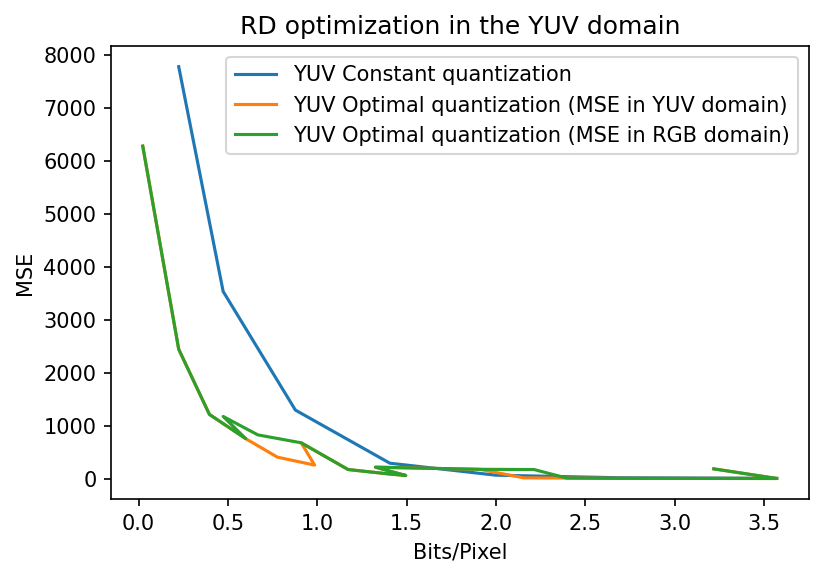

In [18]:
pylab.figure(dpi=150)
pylab.plot(*zip(*YUV_points), label="YUV Constant quantization")
pylab.plot(*zip(*optimal_RD_points), label="YUV Optimal quantization (MSE in YUV domain)")
pylab.plot(*zip(*optimal_RD_points2), label="YUV Optimal quantization (MSE in RGB domain)")
pylab.title("RD optimization in the YUV domain")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc="best")
pylab.show()

The RD curves are not identical, which means that the YCoCg is not orthogonal. However, the results are quite close. Moreover, at least for this image, the performance of measuring the distortion in the YCoCg domain is slighly better than the performance of measuring the distortion in the RGB domain. 

Please, confirm this for other images. Plot the average curve considering also the standard deviation.